In [1]:
from datasets import load_dataset
import json

/home/farzad_rzt/python_env/llava-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("nielsr/docvqa_1200_examples")

Generating test split: 100%|██████████| 200/200 [00:00<00:00, 2273.61 examples/s]


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 200
    })
})

In [4]:
sample_data = dataset["train"]
sample_data

Dataset({
    features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
    num_rows: 1000
})

In [5]:
sample_data = dataset["train"][0]

In [6]:
sample_data["id"]

'train_0'

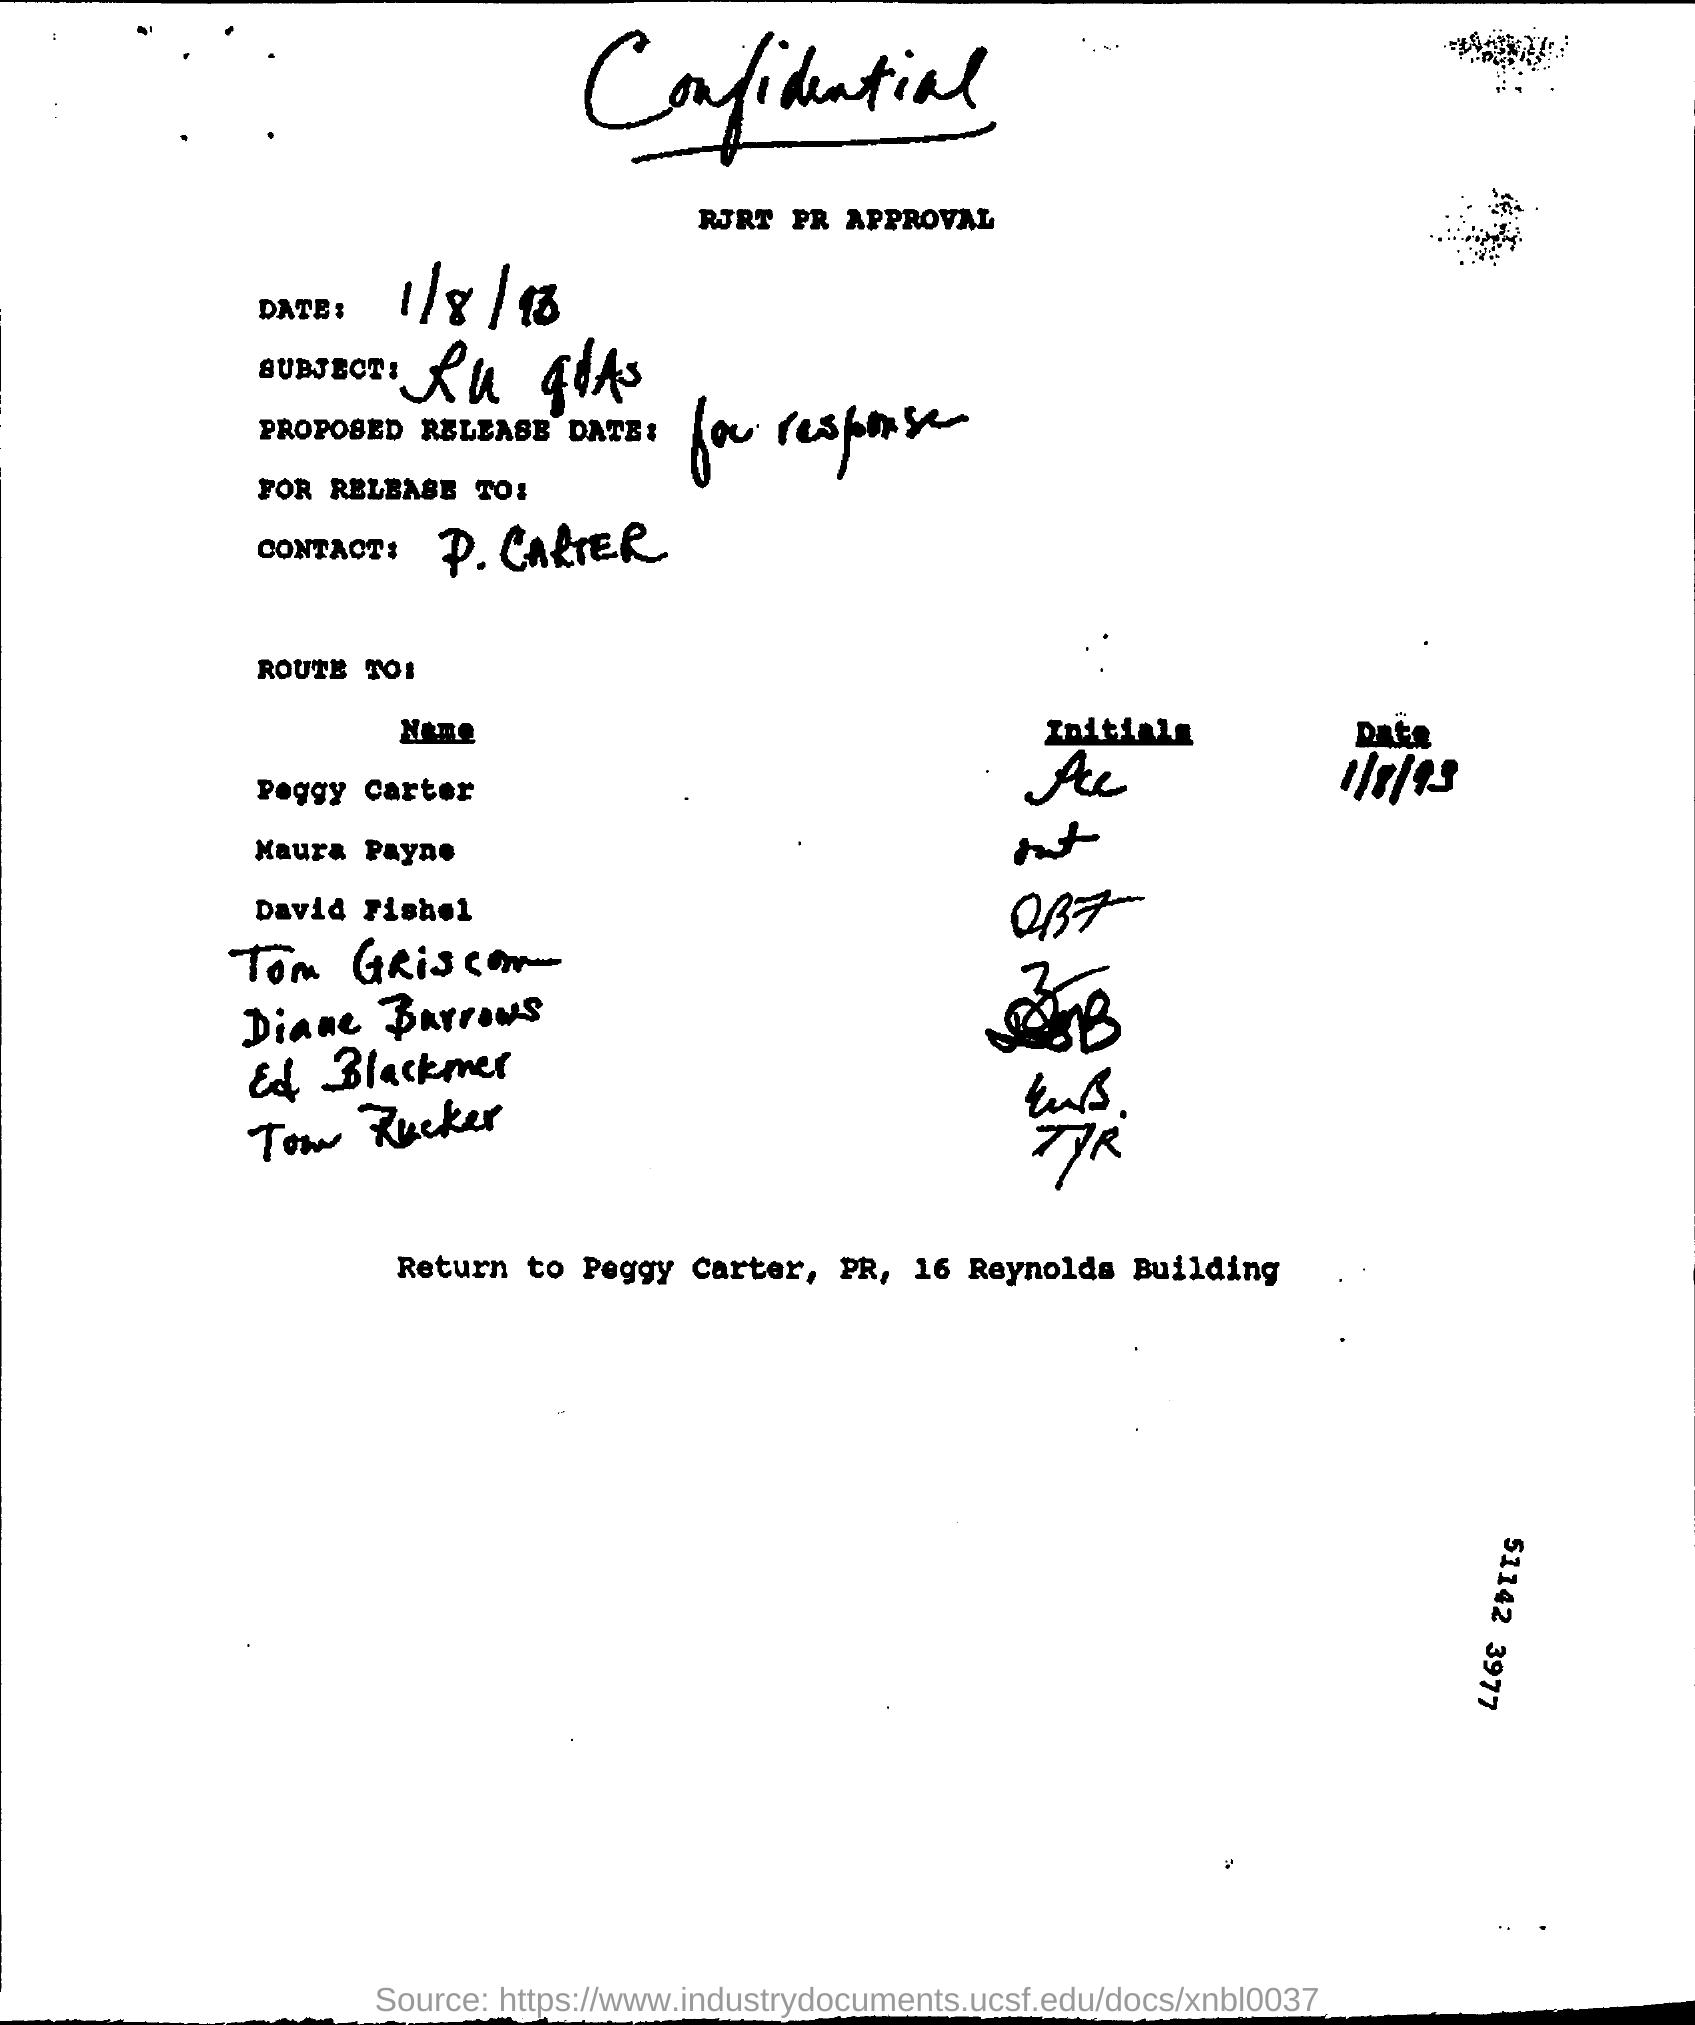

In [7]:
sample_image = dataset["train"][0]["image"]
sample_image

In [8]:
image_size_list = []
for i in range(len(dataset["train"])):
    image_size_list.append(dataset["train"][i]["image"].size)

print(len(set(image_size_list)), "unique image sizes exist in the dataset.")
print()
set(image_size_list)

167 unique image sizes exist in the dataset.



{(399, 1171),
 (463, 610),
 (692, 430),
 (775, 904),
 (792, 1782),
 (792, 1784),
 (830, 595),
 (842, 586),
 (854, 613),
 (857, 614),
 (861, 1821),
 (883, 1223),
 (891, 790),
 (975, 704),
 (1050, 581),
 (1097, 1693),
 (1246, 1754),
 (1450, 2198),
 (1487, 1778),
 (1489, 3120),
 (1492, 3117),
 (1493, 2360),
 (1496, 2356),
 (1532, 1862),
 (1587, 2114),
 (1589, 2084),
 (1595, 2175),
 (1600, 2100),
 (1602, 2102),
 (1604, 2103),
 (1605, 2118),
 (1606, 2104),
 (1607, 2106),
 (1609, 2167),
 (1613, 2185),
 (1620, 2186),
 (1623, 2118),
 (1625, 2192),
 (1631, 2204),
 (1654, 2303),
 (1654, 2339),
 (1656, 2304),
 (1662, 2169),
 (1669, 2279),
 (1670, 2164),
 (1675, 2166),
 (1675, 2169),
 (1676, 2180),
 (1679, 2169),
 (1684, 2180),
 (1685, 2285),
 (1687, 2279),
 (1689, 2194),
 (1689, 2280),
 (1689, 2285),
 (1690, 2182),
 (1692, 2245),
 (1693, 2283),
 (1693, 2286),
 (1693, 2287),
 (1694, 2277),
 (1694, 2279),
 (1694, 2284),
 (1695, 2025),
 (1695, 2148),
 (1695, 2164),
 (1695, 2193),
 (1695, 2200),
 (16

In [9]:
sample_data["query"]

{'de': 'Wie lautet das Datum, das in diesem Brief erwähnt wird?',
 'en': 'what is the date mentioned in this letter?',
 'es': '¿Cuál es la fecha mencionada en esta carta?',
 'fr': 'Quelle est la date mentionnée dans cette lettre?',
 'it': 'Qual è la data indicata in questa lettera?'}

In [10]:
sample_data["answers"]

['1/8/93']

In [11]:
sample_data["answer"]

{'match_score': 0.8333333611111065,
 'matched_text': '1/8/13',
 'start': 43,
 'text': '1/8/93'}

In [12]:
sample_data["words"]

['Confidential',
 '..',
 '..',
 'RJRT',
 'PR',
 'APPROVAL',
 'DATE',
 ':',
 '1/8/13',
 'Ru',
 'alAs',
 'PROPOSED',
 'RELEASE',
 'DATE:',
 'for',
 'response',
 'FOR',
 'RELEASE',
 'TO:',
 'CONTACT:',
 'P.',
 'CARTER',
 'ROUTE',
 'TO',
 'Initials',
 'pate',
 'Peggy',
 'Carter',
 'Ac',
 'Maura',
 'Payne',
 'David',
 'Fishel',
 'Tom',
 'GRISCom',
 'Diane',
 'Barrows',
 'Ed',
 'Blackmer',
 'Tow',
 'Rucker',
 'TR',
 'Return',
 'to',
 'Peggy',
 'Carter,',
 'PR,',
 '16',
 'Reynolds',
 'Building',
 '51142',
 '3977',
 '.',
 '.',
 'Source:',
 'https://www.industrydocuments.ucsf.edu/docs/xnb10037']

In [13]:
sample_data["bounding_boxes"]

[[345.72271728515625,
  14.814814567565918,
  585.8406982421875,
  17.77777862548828],
 [637.1681518554688,
  16.790122985839844,
  647.1976318359375,
  15.802469253540039],
 [650.1475219726562,
  15.802469253540039,
  661.9468994140625,
  15.308642387390137],
 [412.3893737792969,
  100.24691009521484,
  459.5870056152344,
  100.74073791503906],
 [467.84661865234375, 100.74073791503906, 490.85546875, 100.74073791503906],
 [500.29498291015625,
  100.74073791503906,
  587.0206298828125,
  100.74073791503906],
 [152.80235290527344,
  146.17283630371094,
  194.6902618408203,
  145.67901611328125],
 [197.64012145996094,
  145.67901611328125,
  202.35987854003906,
  145.67901611328125],
 [235.9882049560547,
  127.40740966796875,
  328.0235900878906,
  128.88888549804688],
 [251.3274383544922, 164.9382781982422, 308.5545654296875, 163.456787109375],
 [323.3038330078125, 163.456787109375, 379.9410095214844, 164.44444274902344],
 [152.80235290527344,
  205.43209838867188,
  237.75811767578125,


In [14]:
sample_data

{'id': 'train_0',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1695x2025>,
 'query': {'de': 'Wie lautet das Datum, das in diesem Brief erwähnt wird?',
  'en': 'what is the date mentioned in this letter?',
  'es': '¿Cuál es la fecha mencionada en esta carta?',
  'fr': 'Quelle est la date mentionnée dans cette lettre?',
  'it': 'Qual è la data indicata in questa lettera?'},
 'answers': ['1/8/93'],
 'words': ['Confidential',
  '..',
  '..',
  'RJRT',
  'PR',
  'APPROVAL',
  'DATE',
  ':',
  '1/8/13',
  'Ru',
  'alAs',
  'PROPOSED',
  'RELEASE',
  'DATE:',
  'for',
  'response',
  'FOR',
  'RELEASE',
  'TO:',
  'CONTACT:',
  'P.',
  'CARTER',
  'ROUTE',
  'TO',
  'Initials',
  'pate',
  'Peggy',
  'Carter',
  'Ac',
  'Maura',
  'Payne',
  'David',
  'Fishel',
  'Tom',
  'GRISCom',
  'Diane',
  'Barrows',
  'Ed',
  'Blackmer',
  'Tow',
  'Rucker',
  'TR',
  'Return',
  'to',
  'Peggy',
  'Carter,',
  'PR,',
  '16',
  'Reynolds',
  'Building',
  '51142',
  '3977',
  '.',
  

In [22]:
ground_truth = json.loads(sample_data["ground_truth"])
if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
    assert isinstance(ground_truth["gt_parses"], list)
    gt_jsons = ground_truth["gt_parses"]
else:
    assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
    gt_jsons = [ground_truth["gt_parse"]]

KeyError: 'ground_truth'

In [20]:
from typing import Any, Dict

def json2token(obj: Any, sort_json_key: bool = True):
    """
    Convert an ordered JSON object into a token sequence
    """
    if type(obj) == dict:
        if len(obj) == 1 and "text_sequence" in obj:
            return obj["text_sequence"]
        else:
            output = ""
            if sort_json_key:
                keys = sorted(obj.keys(), reverse=True)
            else:
                keys = obj.keys()
            for k in keys:
                output += (
                    fr"<s_{k}>"
                    + json2token(obj[k], sort_json_key)
                    + fr"</s_{k}>"
                )
            return output
    elif type(obj) == list:
        return r"<sep/>".join(
            [json2token(item, sort_json_key) for item in obj]
        )
    else:
        obj = str(obj)
        return obj

In [21]:
[
    json2token(
        gt_json,
        sort_json_key=True,
    )
    for gt_json in gt_jsons  # load json from list of json
]

NameError: name 'gt_jsons' is not defined